# Problem 3 (5 points)

In this problem you will use sklearn's support vector classification to study the effect of changing the parameter C, which represents inverse regularization strength.   

Run the following cell to import libraries, define functions, and load data:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

# Plotting functions:
def plot_data(X,c,s=30):
    lims = [0,1]

    markers = [dict(marker="o", color="royalblue"), dict(marker="s", color="crimson"), dict(marker="^", color="limegreen")]

    x,y = X[:,0], X[:,1]
    iter = 0
    for i in np.unique(c):
        marker = markers[iter]
        iter += 1
        plt.scatter(x[c==i], y[c==i], s=s, **(marker), edgecolor="black", linewidths=0.4, label="y = " + str(i))

def plot_SVs(svm, s=120):
    sv = svm.support_vectors_
    x, y = sv[:,0], sv[:,1]
    plt.scatter(x, y, s=s, edgecolor="black", facecolor="none", linewidths=1.5)

def plot_SV_decision_boundary(svm, margin=True,extend=True, shade_margins=False, shade_decision=False):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xrange = xlim[1] - xlim[0]
    yrange = ylim[1] - ylim[0]

    x = np.linspace(xlim[0] - extend*xrange, xlim[1] + extend*xrange, 200)
    y = np.linspace(ylim[0] - extend*yrange, ylim[1] + extend*yrange, 200)

    X,Y = np.meshgrid(x,y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = svm.decision_function(xy)

    P = P.reshape(X.shape)
    ax.contour(X, Y, P, colors='k',levels=[0],linestyles=['-'])
    if margin:
        ax.contour(X, Y, P, colors='k',levels=[-1, 1], alpha=0.6,linestyles=['--'])

    if shade_margins:
        cmap = ListedColormap(["white","lightgreen"])
        plt.pcolormesh(X,Y,np.abs(P)<1,shading="nearest",cmap=cmap,zorder=-999999)

    if shade_decision:
        cmap = ListedColormap(["lightblue","lightcoral"])
        pred = (svm.predict(xy).reshape(X.shape) == 1).astype(int)
        plt.pcolormesh(X,Y,pred,shading="nearest",cmap=cmap,zorder=-1000)

    plt.xlim(xlim)
    plt.ylim(ylim)

def make_plot(title,svm_model,Xdata,ydata):
    plt.figure(figsize=(5,5))
    plot_data(Xdata,ydata)
    plot_SVs(svm_model)
    plot_SV_decision_boundary(svm_model,margin=True,shade_decision=True)
    plt.legend()
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title(title)
    plt.show()

# Dataset 1:
x1 = np.array([0.48949729, 0.93403431, 0.77318605, 0.99708798, 0.7453347 ,       0.62782192, 0.88728846, 0.71619404, 0.91387844, 0.38568815,
       0.74459769, 0.75305792, 0.79103743, 0.63603483, 0.7035605 ,       0.84037653, 0.47648924, 0.82480262, 0.67128124, 1.00348416,
       0.69268775, 0.74637666, 0.62823845, 0.92394124, 0.52824645,       0.66571952, 0.5772065 , 0.8942154 , 0.84369312, 0.61840017,
       0.68742653, 0.79431218, 0.76105703, 0.729959  , 0.58809188,       0.63920244, 0.75007448, 0.69128972, 0.94851858, 0.88077771,
       0.71621743, 0.68913748, 0.94206083, 0.83811487, 0.52095808,       0.72136467, 0.70606728, 0.65459534, 0.69047433, 0.78913417,
       0.660455  , 0.54130881, 0.99176949, 0.41660508, 0.61517452,       0.76214   , 0.92212188, 0.90712313, 0.61986537, 0.61543379,
       0.26571114, 0.51712792, 0.17642698, 0.38630807, 0.27326383,       0.4757757 , 0.43221499, 0.29701567, 0.2855336 , 0.36724752,
       0.41828429, 0.55323218, 0.30897445, 0.51987077, 0.25015929,       0.29285768, 0.06361631, 0.32100622, 0.44267413, 0.56155981,
       0.43747171, 0.41560485, 0.40850384, 0.53710681, 0.2458796 ,       0.36389757, 0.34206599, 0.44241723, 0.49718833, 0.41927943,
       0.53785843, 0.56305326, 0.18442455, 0.4783044 , 0.341153  ,       0.59226031, 0.34403529, 0.64020965, 0.5783743 , 0.65201187,
       0.54259663, 0.36260852, 0.28089588, 0.28126787, 0.5046967 ,       0.32032048, 0.25728685, 0.30410956, 0.39587441, 0.53701888,
       0.37573027, 0.43281125, 0.10385945, 0.45855828, 0.12496919,       0.43889099, 0.30972969, 0.32992047, 0.40483719, 0.30036318])
x2 = np.array([0.82692832, 0.64782992, 0.51168806, 0.66255369, 0.80959079,       0.74825032, 0.62810149, 0.77523882, 0.76464772, 0.67861015,
       0.74030383, 0.76234673, 0.57673835, 0.76739864, 0.70551825,       0.76417749, 0.68736246, 0.68255718, 0.6896616 , 0.65142488,
       0.72477217, 0.81890284, 0.75486623, 0.57160741, 0.71961768,       0.69643131, 0.78733278, 0.68253707, 0.74527377, 0.85515197,
       0.6174821 , 0.69385581, 0.72352607, 0.57192729, 0.69906178,       0.85159439, 0.65319918, 0.77788724, 0.73044646, 0.79092217,
       0.81828425, 0.61449583, 0.54882155, 0.61557563, 0.76571808,       0.63905784, 0.82482057, 0.71437531, 0.73098551, 0.69257621,
       0.79516325, 0.71840235, 0.67254172, 0.58651416, 0.5778736 ,       0.8128274 , 0.77131005, 0.83007228, 0.58264091, 0.75917111,
       0.3216439 , 0.43068008, 0.48166151, 0.29743746, 0.45100559,       0.37373449, 0.33908254, 0.47230067, 0.42985384, 0.40687294,
       0.3776663 , 0.39820282, 0.43011064, 0.32873478, 0.35169937,       0.25739568, 0.34931656, 0.2860302 , 0.41440527, 0.33384387,
       0.26646292, 0.44178363, 0.28835415, 0.45468991, 0.19393014,       0.42472115, 0.21083439, 0.3441914 , 0.38892878, 0.44150478,
       0.38262922, 0.36293124, 0.4006077 , 0.34750469, 0.35023348,       0.3905313 , 0.17185166, 0.44013747, 0.34005945, 0.36445769,
       0.40579986, 0.23702401, 0.38844385, 0.29752652, 0.18619147,       0.46662002, 0.33503445, 0.43295842, 0.41922308, 0.46949822,
       0.32186971, 0.37281822, 0.36488808, 0.37194919, 0.30829606,       0.39365028, 0.48855396, 0.40258577, 0.46366417, 0.33758804])
y1 = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,        1])
X1 = np.vstack([x1,x2]).T

# Dataset 2:
z1 = np.array([0.4623709 , 0.68787981, 0.22665386, 0.42140211, 0.30510439,       0.53488987, 0.2040148 , 0.39919817, 0.32411647, 0.32894411,
       0.58131992, 0.21989461, 0.41031163, 0.2825145 , 0.71079507,       0.4301869 , 0.29867119, 0.35561876, 0.35892493, 0.3809551 ,
       0.25007082, 0.40050165, 0.45727726, 0.45009186, 0.3127013 ,       0.24118917, 0.37026561, 0.29343492, 0.30929023, 0.32183529,
       0.62142011, 0.24273132, 0.63236235, 0.39114511, 0.48803606,       0.51600837, 0.26834863, 0.52915085, 0.4940113 , 0.22678134,
       0.779535  , 0.94994687, 0.73010308, 0.61598114, 0.61310177,       0.51381933, 0.34398293, 0.61695795, 0.78951194, 0.62907221,
       0.51162408, 0.62770167, 0.80566504, 0.53683386, 0.48664659,       0.66135962, 0.68646158, 0.53325602, 0.46166815, 0.58555708,
       0.82291395, 0.6414185 , 0.54730993, 0.67858451, 0.53265047,       0.49505561, 0.64200182, 0.36407551, 0.76930752, 0.30522461,
       0.64641634, 0.41411608, 0.64992294, 0.60316402, 0.88008764,       0.75418984, 0.4862578 , 0.66244808, 0.77193682, 0.62495635])
z2 = np.array([0.83290004, 0.66234451, 0.65801115, 0.84029466, 0.70126933,       0.82112621, 0.83142114, 0.80780069, 0.69836278, 0.70415788,
       0.81111503, 0.69181695, 0.81230644, 0.68982279, 0.70037483,       0.79716711, 0.85375938, 0.63633106, 0.61071921, 0.74369119,
       0.87396874, 0.63583241, 0.62337179, 0.71575062, 0.59439517,       0.59527384, 0.57959709, 0.56120683, 0.70760421, 0.68391646,
       0.81318113, 0.74471739, 0.76689873, 0.74142189, 0.58628648,       0.58050036, 0.83946113, 0.51560503, 0.75078613, 0.77018053,
       0.49047076, 0.61580307, 0.46660621, 0.41485462, 0.50601875,       0.55752863, 0.53187983, 0.53825942, 0.57596334, 0.70985225,
       0.37757746, 0.47083258, 0.59490871, 0.4743862 , 0.41337164,       0.30688374, 0.48155856, 0.42810555, 0.66923995, 0.29000443,
       0.41406711, 0.58475545, 0.43525632, 0.61888062, 0.47842385,       0.40661197, 0.71625865, 0.61275964, 0.45230234, 0.55631826,
       0.64427582, 0.37797242, 0.59767007, 0.2815758 , 0.5679225 ,       0.35863786, 0.50579416, 0.3072999 , 0.64316316, 0.47989125])
y2 = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])
X2 = np.vstack([z1,z2]).T

## Linearly Separable Dataset
`X1` and `y1` are the features and classes for a linearly separable dataset. Train 4 SVC models on the data. Set `kernel="linear"`, but use four different regularization values:
- C = 0.1
- C = 1
- C = 10
- C = 1000

For each of these models, create a plot that shows the data, decision boundary, and support vectors, complete with a title that states the C value.   
Use the provided function `make_plot(title,svm_model,Xdata,ydata)`

One example has been provided. Please repeat for all of the requested C values:



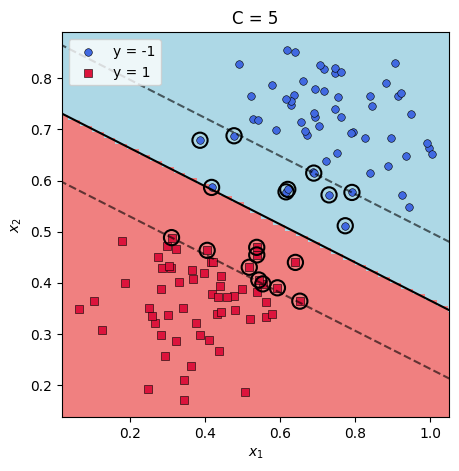

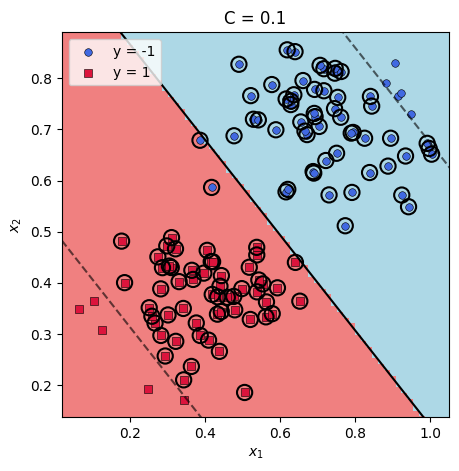

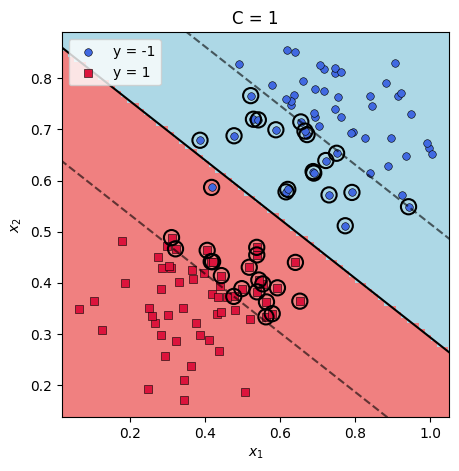

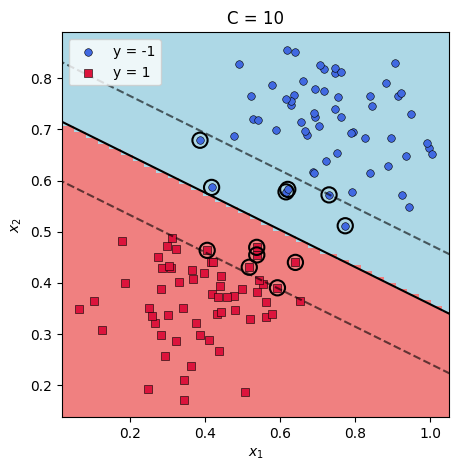

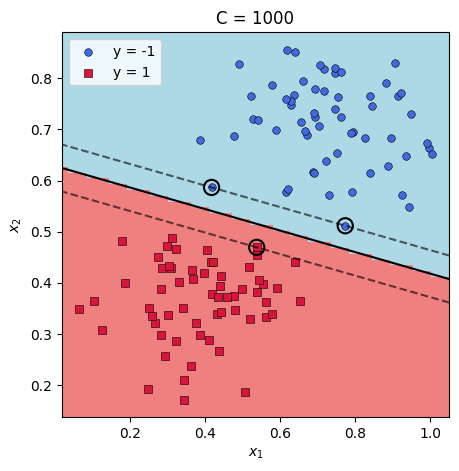

In [2]:
C = 5
svm = SVC(C=C,kernel="linear")
svm.fit(X1,y1)
make_plot(f"C = {C}",svm,X1,y1)


for C in [0.1,1,10,1000]:
    model = SVC(kernel='linear', C=C)
    model.fit(X1, y1)
    make_plot(f"C = {C}", model, X1, y1)

plt.show()


## Linearly Non-Separable Dataset

Repeat the above for the linearly non-separable dataset (`X2` and `y2`).

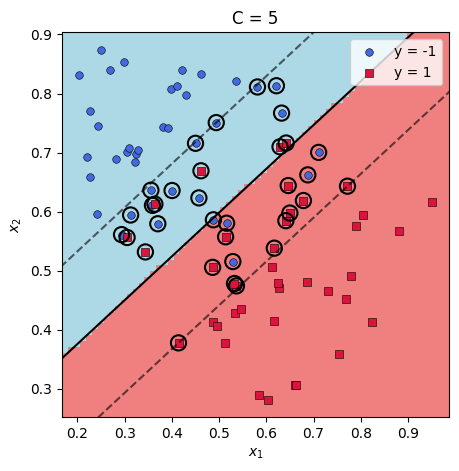

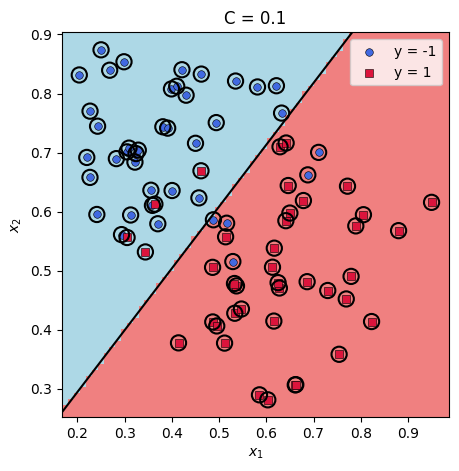

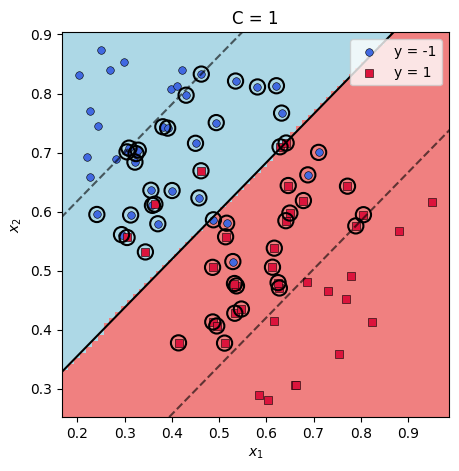

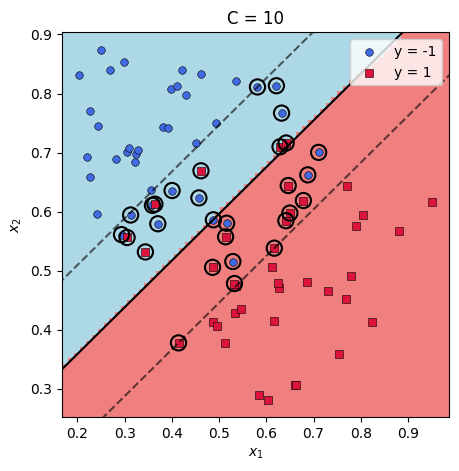

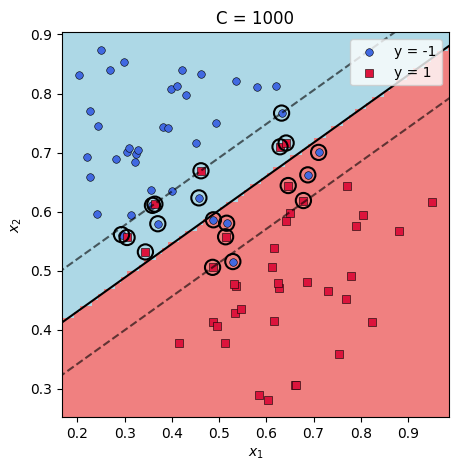

In [3]:
C = 5
svm = SVC(C=C,kernel="linear")
svm.fit(X2,y2)
make_plot(f"C = {C}",svm,X2,y2)


for C in [0.1,1,10,1000]:
    model = SVC(kernel='linear', C=C)
    model.fit(X2, y2)
    make_plot(f"C = {C}", model, X2, y2)

plt.show()